<div style="border:solid green 2px; padding: 20px"> 
Oi Gabriel, tudo bem? 
    
Me chamo Lourenço, vou ser o corretor em português do seu projeto! Prazer em conhecê-l! 🙌 
 
Meus comentários irão seguir a mesma lógica dos feitos pelo corretor antigo:

<div class="alert alert-success">
    <b>Correto:</b> Cumpriu corretamente tudo que foi pedido
</div>
<div class="alert alert-warning">
    <b>Recomendação:</b> Existe espaço para melhoramento do código
</div>
<div class="alert alert-danger">
    <b>Precisa ser corrigido:</b> Esse tipo de comentário ocorre quando o código precisa de alguma mudança drástica. O projeto não pode ser aceito com comentários vermelhos.
</div>
    
Por favor, não delete meus comentários :) Se tiver alguma pergunta, basta respondê-los.

<div class="alert alert-block alert-danger">
<b>Comentário geral do corretor</b> <a class="tocSkip"></a>

Gabriel, primeiramente muito obrigado por enviar o seu projeto! Está claro para mim seu empenho em fazê-lo.
    
<br />
    
Seu projeto está **muito bom**!! Seu código está claro e o seu raciocínio está bem embasado. Você fez o uso correto de todas as técnicas a serem empregadas neste projeto, parabéns! Existem pequenas coisas a serem corrigidas, como alterar o tipo de dado na coluna 'reg_date' que ficou faltando, e também transformar de Mb para Gb dividindo o dado por 1024, não 1000!
    
Fiz alguns comentários a respeito do uso de tabelas pivotadas, que são melhores de visualizar as colunas criadas dos dados, além de sugerir utilizar uma única função para preencher as colunas criadas, mas do jeito que você  fez também está correto.    
    
<br />
    
Apenas altere esses pequenos erros e poderei aprovar seu projeto, bons estudos!
    
</div>

<div class="alert alert-block alert-success">
<b>Comentário geral do corretor v.2</b> <a class="tocSkip"></a>


Suas correções foram bem feitas, de forma que agora posso ter seu projeto como **aprovado**, parabéns!    
    
<br />
    
Espero que você consiga manter esse ritmo nos próximos módulos e que o seu aprendizado continue sendo frutífero. Não hesite em contatar nossos **tutores** em caso de dúvidas. Um abraço!  
    
</div>

# Quais dos planos dão mais receita ?

 O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. 


## Iniciação

Carregue bibliotecas que você acredita que são necessárias para o projeto. Você pode perceber depois que você precisa de bibliotecas adicionais conforme você avança, o que é totalmente normal - apenas certifique-se de atualizar essa seção quando perceber isso.

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Carregue dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv' )
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Sempre importante manter os dataframes e as bibliotecas bem organizados!

</div>

## Explore os dados iniciais

Os conjuntos de dados contém os seguintes campos:

A tabela users (dados sobre usuários):
- `user_id` — identificação do usuário
- `first_name` — nome do usuário
- `last_name` — último sobrenome do usuário
- `age` — idade do usuário (em anos)
- `reg_date` — data da inscrição (dd, mm, aa)
- `churn_date` — a data que o usuário parou de usar o serviço (se o valor for ausente, o plano estava sendo usado quando esse dado foi gerado)
- `city` — cidade de residência do usuário
- `plan` — nome do plano

A tabela calls (dados sobre as chamadas)

- `id` — identificador de chamada unívoco
- `call_date` — data da chamada
- `duration` — duração da chamada (em minutos)
- `user_id` — o identificador do usuário que faz a chamada

A tabela messages (dados nas mensagens de texto):

- `id` — identificador unívoco de mensagem de textos
- `message_date` — data da mensagem de texto
- `user_id` — o identificador do usuário que envia a mensagem de texto

A tabela internet (dados sobre sessões web):

- `id` — identificador de sessão unívoco
- `mb_used` — o volume de dados gasto durante a sessão ( em megabytes)
- `session_date` — data da sessão web
- `user_id` — identificador do usuário

A tabela plans(dados sobre os planos):

- `plan_name` — o nome do plano de chamadas
- `usd_monthly_pay` — preço mensal em dólares dos EUA
- `minutes_included` — pacote de minutos mensal
- `messages_included` — pacote de mensagens de texto mensal
- `mb_per_month_included` — pacote de volume de dados (em megabytes)
- `usd_per_minute` — preço por minuto depois de exceder o limite do pacote (por exemplo, se o pacote inclui 100 minutos, o primeiro minuto excedente será cobrado)
- `usd_per_message` — preço por mensagem de texto depois de exceder o limite do pacote
- `usd_per_gb` — preço por gigabyte extra de dados após exceder o limite do pacote (1 GB = 1024 megabytes)

Agora vamos explorar nossos dados e querer ver quantas colunas e linhas ele tem, veja algumas linhas para verificar possíveis problemas com os dados.

In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
df_calls.info()
print()
print('-------------------------------------------')
print()
df_internet.info()
print()
print('-------------------------------------------')
print()
df_messages.info()
print()
print('-------------------------------------------')
print()
df_plans.info()
print()
print('-------------------------------------------')
print()
df_users.info()
print()
print('-------------------------------------------')
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

-------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

-------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7605

In [4]:
# imprima uma amostragem dos dados
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [5]:
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [6]:
df_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [7]:
df_plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [8]:
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Dados bem visualizados

</div>

Percebemos que não há valores duplicados e algumas colunas estão com dados faltantes, utilizaremos a melhor forma, mas para isso precisamos investigar mais, para que isso não atrapalhe em nossa pesquisa.

In [9]:
# Verificar duplicatas
df_calls.duplicated().sum()

0

In [10]:
df_internet.duplicated().sum()

0

In [11]:
df_messages.duplicated().sum()

0

In [12]:
df_plans.duplicated().sum()

0

In [13]:
df_users.duplicated().sum()

0

No caso da coluna 'churn_date' do DataFrame 'df_users', existem dados estão faltantes, pois essa coluna indica a data que o usuário parou de usar o serviço, caso esteja faltante é coerente dizer que o usuário ainda está ultilizando o plano.

In [14]:
# Verificar Valores Ausentes
df_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [15]:
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [16]:
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [17]:
df_plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [18]:
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

### Conclusões e próximos passos

Verificamos que as demais colunas estão nos conformes, agora iremos verificar o tipo de dados e corrigi-los.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ótimo! Boa visualização dos dados

</div>

## Corrija os tipos de dados

In [19]:
df_calls['user_id'].value_counts(ascending=False)

1324    1300
1077    1224
1334    1140
1362    1121
1320    1080
        ... 
1104       4
1452       3
1306       3
1323       3
1034       2
Name: user_id, Length: 481, dtype: int64

In [20]:
df_calls['call_date'].value_counts(ascending=False)

2018-12-27    1091
2018-12-28    1085
2018-12-30    1080
2018-12-24    1078
2018-12-29    1070
              ... 
2018-01-17       6
2018-01-26       6
2018-01-15       5
2018-01-18       4
2018-01-24       3
Name: call_date, Length: 351, dtype: int64

In [21]:
df_calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [22]:
df_internet['user_id'].value_counts(ascending=False)

1185    851
1028    752
1171    716
1498    657
1214    652
       ... 
1323      3
1034      2
1108      2
1452      1
1306      1
Name: user_id, Length: 489, dtype: int64

In [23]:
df_internet['session_date'].value_counts(ascending=False)

2018-12-24    851
2018-12-30    845
2018-12-27    830
2018-12-21    826
2018-12-31    823
             ... 
2018-01-23      3
2018-01-15      2
2018-01-18      2
2018-01-20      2
2018-01-16      2
Name: session_date, Length: 351, dtype: int64

In [24]:
df_internet['mb_used'].value_counts(ascending=False)

0.00      13747
414.46        8
435.77        8
423.06        7
313.79        7
          ...  
301.21        1
108.62        1
608.63        1
212.02        1
677.66        1
Name: mb_used, Length: 57624, dtype: int64

*comentarios

In [25]:
df_messages['user_id'].value_counts(ascending=False)

1132    1288
1328    1233
1324    1175
1470    1056
1077     804
        ... 
1481       3
1477       3
1161       2
1323       1
1479       1
Name: user_id, Length: 402, dtype: int64

In [26]:
df_messages['message_date'].value_counts(ascending=False)

2018-12-28    702
2018-12-27    701
2018-12-25    699
2018-12-31    699
2018-12-18    688
             ... 
2018-01-21      3
2018-01-24      2
2018-01-15      2
2018-02-18      2
2018-01-19      1
Name: message_date, Length: 351, dtype: int64

*comentarios

In [27]:
df_users['user_id'].value_counts(ascending=False)

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

In [28]:
df_users['first_name'].value_counts(ascending=False)

Leonila       3
Jasper        3
Seymour       3
Dierdre       2
Georgianne    2
             ..
Charlsie      1
Boyd          1
Nicolas       1
Darron        1
Elton         1
Name: first_name, Length: 458, dtype: int64

In [29]:
df_users['last_name'].value_counts(ascending=False)

Thompson     3
Wilkinson    3
Reese        3
Kelley       3
Grimes       3
            ..
Lopez        1
Colon        1
Conner       1
Snider       1
Barrett      1
Name: last_name, Length: 399, dtype: int64

In [30]:
df_users['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

In [31]:
df_users['reg_date'].value_counts(ascending=False)

2018-08-03    5
2018-02-06    5
2018-03-08    5
2018-06-04    5
2018-11-29    5
             ..
2018-09-07    1
2018-06-03    1
2018-10-30    1
2018-08-06    1
2018-08-18    1
Name: reg_date, Length: 266, dtype: int64

In [32]:
df_users['churn_date'].value_counts(ascending=False,dropna=False)

NaN           466
2018-12-18      3
2018-12-31      2
2018-12-19      2
2018-11-14      2
2018-09-18      1
2018-09-07      1
2018-12-22      1
2018-12-27      1
2018-11-16      1
2018-10-13      1
2018-07-31      1
2018-12-12      1
2018-12-30      1
2018-11-29      1
2018-12-10      1
2018-12-26      1
2018-11-21      1
2018-10-22      1
2018-09-17      1
2018-10-03      1
2018-12-15      1
2018-11-18      1
2018-09-01      1
2018-08-19      1
2018-11-11      1
2018-10-07      1
2018-11-24      1
2018-08-16      1
2018-11-30      1
Name: churn_date, dtype: int64

In [33]:
df_users['city'].value_counts(ascending=False)

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Jacksonville, FL MSA                                1
El Paso, TX MSA                                     1
Stockton, CA MSA                                    1
Albany-Schenectady-Troy, NY MSA                     1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Name: city, Length: 73, dtype: int64

In [34]:
df_users['plan'].value_counts(ascending=False)

surf        339
ultimate    161
Name: plan, dtype: int64

*comentarios

In [35]:
df_plans['plan_name'].value_counts(ascending=False)

ultimate    1
surf        1
Name: plan_name, dtype: int64

In [36]:
df_plans['messages_included'].value_counts(ascending=False)

1000    1
50      1
Name: messages_included, dtype: int64

In [37]:
df_plans['minutes_included'].value_counts(ascending=False)

500     1
3000    1
Name: minutes_included, dtype: int64

In [38]:
df_plans['mb_per_month_included'].value_counts(ascending=False)

15360    1
30720    1
Name: mb_per_month_included, dtype: int64

In [39]:
df_plans['usd_per_minute'].value_counts(ascending=False)

0.01    1
0.03    1
Name: usd_per_minute, dtype: int64

In [40]:
df_plans['usd_per_message'].value_counts(ascending=False)

0.01    1
0.03    1
Name: usd_per_message, dtype: int64

In [41]:
df_plans['usd_per_gb'].value_counts(ascending=False)

10    1
7     1
Name: usd_per_gb, dtype: int64

Verificamos que as demais colunas estão nos conformes, e valores estão coerentes, apenas iremos alterar as colunas que são datas para ficar no formato 'datetime'

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok! Para imprimir 'value_counts' de todas as colunas poderia ter feito um 'for' para percorrer todas as colunas dos dfs, sem precisar digitar cada coluna manualmente.

</div>

## Corrija os tipos de dados

In [42]:
# transformando valores de data em datatime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [43]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [44]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [45]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [46]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

<div class="alert alert-block alert-danger">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ficou faltando a coluna 'reg_date' de 'df_users'!

</div>

<div class="alert alert-block alert-success">
<b>Comentário do corretor v.2</b> <a class="tocSkip"></a>

Boa!

</div>

In [47]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [48]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [49]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [50]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Tipo de dados alterados e conferidos.

## Enriqueça os dados

Iremos fazer um 'merge', uma junção de todos os DataFrame, vinculados pelo 'user_id'.
Em algumas ocasiões irão ficar nulos, pois poderá acontecer que uma pessoa não use todos os serviços do plano.
Primeiramente iremos separar pelo mês de ultilização dos serviços do plano.

Iremos verificar o serviço de ligação e criar uma coluna 'month' com o mês de utilização desse serviço.

In [51]:
df_calls['month'] = df_calls['call_date'].dt.month

In [52]:
df_users_calls = df_users.merge(df_calls, on=['user_id'],how="left")

In [53]:
df_users_calls.isna().sum()

user_id            0
first_name         0
last_name          0
age                0
city               0
reg_date           0
plan               0
churn_date    128753
id                19
call_date         19
duration          19
month             19
dtype: int64

In [54]:
df_users_calls[df_users_calls['id'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,call_date,duration,month
5400,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaT,NaN,NaT,NaN,NaN
21810,1080,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,NaT,NaN,NaT,NaN,NaN
23831,1089,Malena,Kelley,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-03,surf,NaT,NaN,NaT,NaN,NaN
28376,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaT,NaN,NaT,NaN,NaN
32166,1121,Kathaleen,Albert,34,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-13,surf,NaT,NaN,NaT,NaN,NaN
34485,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,NaN,NaT,NaN,NaN
34746,1131,Shane,Morrison,60,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-07,surf,NaT,NaN,NaT,NaN,NaN
36058,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,NaT,NaN,NaT,NaN,NaN
38131,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT,NaN,NaT,NaN,NaN
53839,1194,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,NaT,NaN,NaT,NaN,NaN


Como analisamos acima 19 pessoas não utilizaram do serviço de ligação, iremos substituir o valor por 0.

In [55]:
df_users_calls[['id','call_date','duration','month']] = df_users_calls[['id','call_date','duration','month']].fillna(0)

In [56]:
df_users_calls.isna().sum()

user_id            0
first_name         0
last_name          0
age                0
city               0
reg_date           0
plan               0
churn_date    128753
id                 0
call_date          0
duration           0
month              0
dtype: int64

In [57]:
df_users_calls

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,call_date,duration,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_93,2018-12-27 00:00:00,8.52,12.0
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_145,2018-12-27 00:00:00,13.66,12.0
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_247,2018-12-27 00:00:00,14.48,12.0
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_309,2018-12-28 00:00:00,5.76,12.0
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_380,2018-12-30 00:00:00,4.22,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
137749,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_199,2018-11-21 00:00:00,8.72,11.0
137750,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_200,2018-10-20 00:00:00,10.89,10.0
137751,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_201,2018-09-21 00:00:00,8.12,9.0
137752,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_202,2018-10-10 00:00:00,0.37,10.0


Iremos verificar o serviço de internet e criar uma coluna 'month' com o mês de utilização desse serviço.

In [58]:
df_internet['month'] = df_internet['session_date'].dt.month

In [59]:
df_users_internet = df_users.merge(df_internet, on=['user_id'],how="left")

In [60]:
df_users_internet.isna().sum()

user_id             0
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan                0
churn_date      97368
id                 11
session_date       11
mb_used            11
month              11
dtype: int64

In [61]:
df_users_internet[df_users_internet['id'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,session_date,mb_used,month
4132,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaT,NaN,NaT,NaN,NaN
28216,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,NaN,NaT,NaN,NaN
31309,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT,NaN,NaT,NaN,NaN
59942,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,NaN,NaT,NaN,NaN
60520,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT,NaN,NaT,NaN,NaN
66233,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT,NaN,NaT,NaN,NaN
68342,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT,NaN,NaT,NaN,NaN
80943,1378,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT,NaN,NaT,NaN,NaN
98139,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT,NaN,NaT,NaN,NaN
99629,1470,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-21,surf,NaT,NaN,NaT,NaN,NaN


Como analisamos acima 11 pessoas não utilizaram do serviço de internet, iremos substituir o valor por 0.

In [62]:
df_users_internet[['id','session_date','mb_used','month']] = df_users_internet[['id','session_date','mb_used','month']].fillna(0)

In [63]:
df_users_internet.isna().sum()

user_id             0
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan                0
churn_date      97368
id                  0
session_date        0
mb_used             0
month               0
dtype: int64

In [64]:
df_users_internet

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,session_date,mb_used,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_13,2018-12-29 00:00:00,89.86,12.0
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_204,2018-12-31 00:00:00,0.00,12.0
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_379,2018-12-28 00:00:00,660.40,12.0
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_413,2018-12-26 00:00:00,270.99,12.0
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_442,2018-12-27 00:00:00,880.22,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104831,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_215,2018-10-20 00:00:00,218.06,10.0
104832,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_216,2018-12-30 00:00:00,304.72,12.0
104833,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_217,2018-09-22 00:00:00,292.75,9.0
104834,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_218,2018-12-07 00:00:00,0.00,12.0


Iremos verificar o serviço de mensagens e criar uma coluna 'month' com o mês de utilização desse serviço.

In [65]:
df_messages['month'] = df_messages['message_date'].dt.month

In [66]:
df_users_messages = df_users.merge(df_messages, on=['user_id'],how="left")

In [67]:
df_users_messages.isna().sum()

user_id             0
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan                0
churn_date      71743
id                 98
message_date       98
month              98
dtype: int64

In [68]:
df_users_messages[df_users_messages['id'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,message_date,month
1037,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,NaN,NaT,NaN
1038,1010,Wilber,Blair,52,"Dallas-Fort Worth-Arlington, TX MSA",2018-03-09,surf,NaT,NaN,NaT,NaN
1410,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,NaN,NaT,NaN
1987,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,NaT,NaN,NaT,NaN
1988,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
75338,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaT,NaN,NaT,NaN
75856,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaT,NaN,NaT,NaN
76031,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,NaN,NaT,NaN
76147,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,NaN,NaT,NaN


Como analisamos acima 98 pessoas não utilizaram do serviço de mensagens, iremos substituir o valor por 0.

In [69]:
df_users_messages[['id','message_date','month']] = df_users_messages[['id','message_date','month']].fillna(0)

In [70]:
df_users_messages.isna().sum()

user_id             0
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan                0
churn_date      71743
id                  0
message_date        0
month               0
dtype: int64

In [71]:
df_users_messages

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,message_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_125,2018-12-27 00:00:00,12.0
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_160,2018-12-31 00:00:00,12.0
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_223,2018-12-31 00:00:00,12.0
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_251,2018-12-27 00:00:00,12.0
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_255,2018-12-26 00:00:00,12.0
...,...,...,...,...,...,...,...,...,...,...,...
76144,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,1497_547,2018-12-31 00:00:00,12.0
76145,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,1497_558,2018-12-24 00:00:00,12.0
76146,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,1497_613,2018-12-23 00:00:00,12.0
76147,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,0,0,0.0


Agora Iremos fazer a soma de duração de chamadas pelo mês correspondente em cada usuário.

In [72]:
df_users_calls_group = df_users_calls.groupby(['user_id','month'])['duration'].agg('sum').reset_index().rename(columns={"duration":"total_duration_calls"})
df_users_calls_group

,user_id,month,total_duration_calls
0,1000,12.0,116.83
1,1001,8.0,171.14
2,1001,9.0,297.69
3,1001,10.0,374.11
4,1001,11.0,404.59
...,...,...,...
2272,1498,12.0,324.77
2273,1499,9.0,330.37
2274,1499,10.0,363.28
2275,1499,11.0,288.56


Agora Iremos fazer a soma de megabytes de internet pelo mês correspondente em cada usuário.

In [73]:
df_users_internet_group = df_users_internet.groupby(['user_id','month'])['mb_used'].agg('sum').reset_index().rename(columns={"mb_used":"total_mb_used_internet"})
df_users_internet_group

,user_id,month,total_mb_used_internet
0,1000,12.0,1901.47
1,1001,8.0,6919.15
2,1001,9.0,13314.82
3,1001,10.0,22330.49
4,1001,11.0,18504.30
...,...,...,...
2283,1498,12.0,23137.69
2284,1499,9.0,12984.76
2285,1499,10.0,19492.43
2286,1499,11.0,16813.83


Agora Iremos fazer a soma dquantidade de mensagens pelo mês correspondente em cada usuário.

In [74]:
df_users_messages_group = df_users_messages.groupby(['user_id','month'])['id'].agg('count').reset_index().rename(columns={"id":"count_messages"})
df_users_messages_group

,user_id,month,count_messages
0,1000,12.0,11
1,1001,8.0,30
2,1001,9.0,44
3,1001,10.0,53
4,1001,11.0,36
...,...,...,...
1899,1496,11.0,13
1900,1496,12.0,11
1901,1497,12.0,50
1902,1498,0.0,1


Vamos da uma olhada nos dados para verificar se o merge será feito corretamente.

In [75]:
df_users_calls_group.query('user_id == 1499')

,user_id,month,total_duration_calls
2273,1499,9.0,330.37
2274,1499,10.0,363.28
2275,1499,11.0,288.56
2276,1499,12.0,468.10


In [76]:
df_users_internet_group.query('user_id == 1499')

,user_id,month,total_mb_used_internet
2284,1499,9.0,12984.76
2285,1499,10.0,19492.43
2286,1499,11.0,16813.83
2287,1499,12.0,22059.21


In [77]:
df_users_messages_group.query('user_id == 1499')

,user_id,month,count_messages
1903,1499,0.0,1


Realizamos o 'merge'

In [78]:
df_final = df_users_internet_group.merge(df_users_calls_group,how='outer')

In [79]:
df_final = df_final.merge(df_users_messages_group,how = 'outer')

In [80]:
df_final.isna().sum()

user_id                     0
month                       0
total_mb_used_internet    112
total_duration_calls      123
count_messages            496
dtype: int64

In [81]:
df_final[['total_mb_used_internet','total_duration_calls','count_messages']] = df_final[['total_mb_used_internet','total_duration_calls','count_messages']].fillna(0)

In [82]:
df_final

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages
0,1000,12.0,1901.47,116.83,11.0
1,1001,8.0,6919.15,171.14,30.0
2,1001,9.0,13314.82,297.69,44.0
3,1001,10.0,22330.49,374.11,53.0
4,1001,11.0,18504.30,404.59,36.0
...,...,...,...,...,...
2395,1490,0.0,0.00,0.00,1.0
2396,1493,0.0,0.00,0.00,1.0
2397,1495,0.0,0.00,0.00,1.0
2398,1498,0.0,0.00,0.00,1.0


In [83]:
df_final.query('user_id == 1499')

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages
2284,1499,9.0,12984.76,330.37,0.0
2285,1499,10.0,19492.43,363.28,0.0
2286,1499,11.0,16813.83,288.56,0.0
2287,1499,12.0,22059.21,468.10,0.0
2399,1499,0.0,0.00,0.00,1.0


A junção dos DataFrames foi realizada corretamente, porém há colunas que estão todas preenchidas com '0' pois não há registo de ultização ou sem um mês para que possamos alocar, iremos excluir esses dados para não atrapalhar em nossas pesquisas.

In [84]:
df_final_full = df_final.merge(df_users,on=['user_id'],how="right")

In [85]:
df_final_full

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,1901.47,116.83,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,8.0,6919.15,171.14,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,9.0,13314.82,297.69,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,10.0,22330.49,374.11,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,11.0,18504.30,404.59,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1499,9.0,12984.76,330.37,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT
2396,1499,10.0,19492.43,363.28,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT
2397,1499,11.0,16813.83,288.56,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT
2398,1499,12.0,22059.21,468.10,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT


<div class="alert alert-block alert-warning">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Entendi porque quis unir todos os dataframes em um só para conseguir trabalhar com todos os dados de uma vez. Porém, acredito ser mais simples utilizar a função 'pivot_table', de forma a obter, para cada coluna desejada, os valores de cada usuário para cada plano.

</div>

## Calculando Receita Mensal para cada Usuário

Fizemos a junção do nosso DataFrame com as informções do consumo usuários por mês com o DataFrame com a cota dos planos e penalidades


In [86]:
df_final_plans = df_final_full.merge(df_plans,left_on='plan' ,right_on='plan_name',how="left")

In [87]:
df_final_plans

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,1901.47,116.83,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8.0,6919.15,171.14,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2,1001,9.0,13314.82,297.69,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
3,1001,10.0,22330.49,374.11,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
4,1001,11.0,18504.30,404.59,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1499,9.0,12984.76,330.37,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2396,1499,10.0,19492.43,363.28,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2397,1499,11.0,16813.83,288.56,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2398,1499,12.0,22059.21,468.10,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,50,15360,500,20,10,0.03,0.03,surf


In [88]:
def preencher_exceeded_call_plans(row):
    if row['plan_name'] == 'surf'and row['total_duration_calls'] > row['minutes_included']:
        return int(row['total_duration_calls']) - int(row['minutes_included']) + 1
    elif row['plan_name'] == 'surf'and row['total_duration_calls'] <= row['minutes_included']:
        return 0
    elif row['plan_name'] == 'ultimate'and row['total_duration_calls'] > row['minutes_included']:
        return float(row['total_duration_calls']) - float(row['minutes_included'])
    elif row['plan_name'] == 'ultimate'and row['total_duration_calls'] <= row['minutes_included']:
        return 0

Essa função acima irá calcular a subtração do limite do pacote grátis do número total de minutos de chamadas e aplicara a penalidade caso exceda o limite, testaremos a função e criaremos uma nova coluna com os dados do valores excentes , caso o valor fique '0' não há penalidades.

In [89]:
preencher_exceeded_call_plans(df_final_plans.loc[9])

541

In [90]:
df_final_plans['exceeded_call_plans'] = df_final_plans.apply(preencher_exceeded_call_plans, axis=1)

In [91]:
df_final_plans[df_final_plans['total_duration_calls']> 500].sort_values(by='total_duration_calls', ascending=False)

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,exceeded_call_plans
1326,1267,12.0,37544.16,1431.22,125.0,Gia,Parker,53,"St. Louis, MO-IL MSA",2018-03-12,...,NaT,50,15360,500,20,10,0.03,0.03,surf,932
1590,1329,12.0,25859.40,1292.09,97.0,Doyle,Nunez,65,"Charleston-North Charleston, SC MSA",2018-08-25,...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,0
1781,1365,12.0,8219.25,1283.20,45.0,Milford,Rush,19,"Grand Rapids-Kentwood, MI MSA",2018-02-09,...,NaT,50,15360,500,20,10,0.03,0.03,surf,784
1561,1324,11.0,18287.93,1234.57,116.0,Romana,Moore,18,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,...,NaT,50,15360,500,20,10,0.03,0.03,surf,735
1852,1382,12.0,10969.81,1222.37,52.0,Luci,Kidd,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-06-22,...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,1490,9.0,36147.19,501.19,0.0,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,0
1425,1293,9.0,32271.60,500.87,96.0,Lanny,Nolan,23,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-13,...,NaT,50,15360,500,20,10,0.03,0.03,surf,1
1262,1256,10.0,10774.25,500.79,20.0,Johnny,Wise,53,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-11,...,NaT,50,15360,500,20,10,0.03,0.03,surf,1
2230,1464,11.0,13309.59,500.51,31.0,Burt,Burke,70,"Providence-Warwick, RI-MA MSA",2018-11-07,...,NaT,50,15360,500,20,10,0.03,0.03,surf,1


Essa função acima irá calcular a subtração do limite do pacote grátis do número megabytes usados de internet e aplicara a penalidade caso exceda o limite, testaremos a função e criaremos uma nova coluna com os dados do valores excentes, caso o valor fique '0' não há penalidades.

In [92]:
def preencher_exceeded_internet_plans(row):
    if row['plan_name'] == 'surf'and row['total_mb_used_internet'] > row['mb_per_month_included']:
        return int(int((row['total_mb_used_internet']) - int(row['mb_per_month_included']))/1024) + 1
    elif row['plan_name'] == 'surf'and row['total_mb_used_internet'] <= row['mb_per_month_included']:
        return 0
    elif row['plan_name'] == 'ultimate'and row['total_mb_used_internet'] > row['mb_per_month_included']:
        return int(int((row['total_mb_used_internet']) - int(row['mb_per_month_included']))/1024) + 1
    elif row['plan_name'] == 'ultimate'and row['total_mb_used_internet'] <= row['mb_per_month_included']:
        return 0

<div class="alert alert-block alert-danger">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

1 GB = 1024 MB, não 1000, tome cuidado!

</div>

<div class="alert alert-block alert-success">
<b>Comentário do corretor v.2</b> <a class="tocSkip"></a>
    
Ok!

</div>

In [93]:
preencher_exceeded_internet_plans(df_final_plans.loc[1137])

0

In [94]:
preencher_exceeded_internet_plans(df_final_plans.loc[20])

2

In [95]:
df_final_plans['exceeded_internet_plans'] = df_final_plans.apply(preencher_exceeded_internet_plans, axis=1)

In [96]:
df_final_plans[df_final_plans['total_mb_used_internet']> 30000].sort_values(by='plan', ascending=False)

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,exceeded_call_plans,exceeded_internet_plans
20,1006,12.0,32118.82,54.79,139.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,2
619,1126,8.0,34307.16,901.49,88.0,Jermaine,Mcguire,68,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-02,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,4
715,1144,7.0,38583.96,664.34,64.0,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,8
716,1144,8.0,36704.71,540.45,86.0,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,6
717,1144,9.0,37587.03,469.06,74.0,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1240,9.0,30851.55,1146.22,12.0,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,...,50,15360,500,20,10,0.03,0.03,surf,647,16
1182,1240,8.0,49950.58,1038.88,15.0,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,...,50,15360,500,20,10,0.03,0.03,surf,539,34
1181,1240,7.0,34750.43,1112.88,9.0,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,...,50,15360,500,20,10,0.03,0.03,surf,613,19
1081,1215,12.0,34298.28,1108.45,98.0,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,...,50,15360,500,20,10,0.03,0.03,surf,609,19


Essa função acima irá calcular a subtração do limite do pacote grátis do número total de mensagens e aplicara a penalidade caso exceda o limite, testaremos a função e criaremos uma nova coluna com os dados do valores excentes, caso o valor fique '0' não há penalidades.

In [97]:
def preencher_exceeded_messages_plans(row):
    if row['plan_name'] == 'surf'and row['count_messages'] > row['messages_included']:
        return int(row['count_messages']) - int(row['messages_included'])
    elif row['plan_name'] == 'surf'and row['count_messages'] <= row['messages_included']:
        return 0
    elif row['plan_name'] == 'ultimate'and row['count_messages'] > row['messages_included']:
        return int(row['count_messages']) - (row['messages_included'])
    elif row['plan_name'] == 'ultimate'and row['count_messages'] <= row['messages_included']:
        return 0

<div class="alert alert-block alert-warning">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Talvez seria mais interessante criar uma única função para preencher essas colunas

</div>

In [98]:
df_final_plans[df_final_plans['count_messages']> 50].sort_values(by='plan', ascending=False)

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,exceeded_call_plans,exceeded_internet_plans
716,1144,8.0,36704.71,540.45,86.0,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,6
1981,1405,10.0,18971.88,174.09,78.0,Shella,Hunter,34,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-22,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0
665,1133,11.0,16483.21,296.54,102.0,Larry,Barr,50,"Cincinnati, OH-KY-IN MSA",2018-07-21,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0
666,1133,12.0,12440.39,247.07,85.0,Larry,Barr,50,"Cincinnati, OH-KY-IN MSA",2018-07-21,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0
2022,1412,8.0,14893.45,868.99,54.0,Cortez,Reese,61,"Detroit-Warren-Dearborn, MI MSA",2018-04-08,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1203,7.0,11843.80,412.85,58.0,Manie,Grimes,50,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-11,...,50,15360,500,20,10,0.03,0.03,surf,0,0
1020,1203,5.0,13325.49,554.96,63.0,Manie,Grimes,50,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-11,...,50,15360,500,20,10,0.03,0.03,surf,55,0
1019,1203,4.0,18087.22,542.39,53.0,Manie,Grimes,50,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-11,...,50,15360,500,20,10,0.03,0.03,surf,43,3
981,1195,12.0,11567.68,684.67,123.0,Roy,Velez,60,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-09,...,50,15360,500,20,10,0.03,0.03,surf,185,0


In [99]:
preencher_exceeded_messages_plans(df_final_plans.loc[20])

0

In [100]:
preencher_exceeded_messages_plans(df_final_plans.loc[2396])

0

In [101]:
df_final_plans['exceeded_messages_plans'] = df_final_plans.apply(preencher_exceeded_messages_plans, axis=1)

In [102]:
df_final_plans

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,exceeded_call_plans,exceeded_internet_plans,exceeded_messages_plans
0,1000,12.0,1901.47,116.83,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,30720,3000,70,7,0.01,0.01,ultimate,0,0,0
1,1001,8.0,6919.15,171.14,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,0,0,0
2,1001,9.0,13314.82,297.69,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,0,0,0
3,1001,10.0,22330.49,374.11,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,0,7,3
4,1001,11.0,18504.30,404.59,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1499,9.0,12984.76,330.37,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,15360,500,20,10,0.03,0.03,surf,0,0,0
2396,1499,10.0,19492.43,363.28,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,15360,500,20,10,0.03,0.03,surf,0,5,0
2397,1499,11.0,16813.83,288.56,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,15360,500,20,10,0.03,0.03,surf,0,2,0
2398,1499,12.0,22059.21,468.10,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,15360,500,20,10,0.03,0.03,surf,0,7,0


Agora iremos calcular a receita total de cada usuáio por mês mediante ao plano que usa, já incluido com o preço e penalidades em um somatório , que resultará num valor em dolar que usuário deve pagar.

In [103]:
df_final_plans['revenue'] = (((df_final_plans['exceeded_call_plans'])*df_final_plans['usd_per_minute'])+((df_final_plans['exceeded_internet_plans'])*df_final_plans['usd_per_gb'])+((df_final_plans['exceeded_messages_plans'])*df_final_plans['usd_per_message']))+df_final_plans['usd_monthly_pay']

In [104]:
df_final_plans.sort_values(by='revenue', ascending=False)

,user_id,month,total_mb_used_internet,total_duration_calls,count_messages,first_name,last_name,age,city,reg_date,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,exceeded_call_plans,exceeded_internet_plans,exceeded_messages_plans,revenue
1837,1379,12.0,70931.59,1045.24,126.0,Jarrett,Spencer,34,"Grand Rapids-Kentwood, MI MSA",2018-10-18,...,500,20,10,0.03,0.03,surf,546,55,76,588.66
596,1121,12.0,66863.89,0.00,97.0,Kathaleen,Albert,34,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-13,...,500,20,10,0.03,0.03,surf,0,51,47,531.41
1418,1292,8.0,51809.35,304.67,0.0,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,...,500,20,10,0.03,0.03,surf,0,36,0,380.00
1422,1292,12.0,52034.66,132.65,0.0,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,...,500,20,10,0.03,0.03,surf,0,36,0,380.00
1182,1240,8.0,49950.58,1038.88,15.0,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,...,500,20,10,0.03,0.03,surf,539,34,0,376.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1259,10.0,1953.30,92.40,41.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,...,500,20,10,0.03,0.03,surf,0,0,0,20.00
1288,1259,11.0,3239.70,99.09,32.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,...,500,20,10,0.03,0.03,surf,0,0,0,20.00
1289,1259,12.0,1078.27,177.98,36.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,...,500,20,10,0.03,0.03,surf,0,0,0,20.00
1291,1261,2.0,7045.44,53.34,11.0,Dusti,Forbes,31,"Kansas City, MO-KS MSA",2018-02-22,...,500,20,10,0.03,0.03,surf,0,0,0,20.00


Faremos um filtro apenas nas colunas que iremos usar em nossa pesquisa.

In [105]:
df = df_final_plans[['user_id','total_mb_used_internet','total_duration_calls','count_messages','month','first_name','last_name','age','city','reg_date','plan_name','revenue']]

In [106]:
df

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
0,1000,1901.47,116.83,11.0,12.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,70.00
1,1001,6919.15,171.14,30.0,8.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
2,1001,13314.82,297.69,44.0,9.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
3,1001,22330.49,374.11,53.0,10.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,90.09
4,1001,18504.30,404.59,36.0,11.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1499,12984.76,330.37,0.0,9.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,20.00
2396,1499,19492.43,363.28,0.0,10.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,70.00
2397,1499,16813.83,288.56,0.0,11.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,40.00
2398,1499,22059.21,468.10,0.0,12.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,90.00


In [107]:
df.sort_values(by='revenue', ascending=False)

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
1837,1379,70931.59,1045.24,126.0,12.0,Jarrett,Spencer,34,"Grand Rapids-Kentwood, MI MSA",2018-10-18,surf,588.66
596,1121,66863.89,0.00,97.0,12.0,Kathaleen,Albert,34,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-13,surf,531.41
1418,1292,51809.35,304.67,0.0,8.0,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,surf,380.00
1422,1292,52034.66,132.65,0.0,12.0,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,surf,380.00
1182,1240,49950.58,1038.88,15.0,8.0,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,surf,376.17
...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1259,1953.30,92.40,41.0,10.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,surf,20.00
1288,1259,3239.70,99.09,32.0,11.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,surf,20.00
1289,1259,1078.27,177.98,36.0,12.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,surf,20.00
1291,1261,7045.44,53.34,11.0,2.0,Dusti,Forbes,31,"Kansas City, MO-KS MSA",2018-02-22,surf,20.00


Como podemos perceber, há valores exorbitantes em nosso Dataframe e há meses que não podemos identificar.
Iremos separar os meses em um outro DataFrase para avaliar o quanto a ausência deles afeta os resultados da análise.

In [108]:
df_month_nan = df[df['month']==0]

In [109]:
df_month_nan.head(5)

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
37,1009,0.0,0.0,1.0,0.0,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,20.0
47,1010,0.0,0.0,1.0,0.0,Wilber,Blair,52,"Dallas-Fort Worth-Arlington, TX MSA",2018-03-09,surf,20.0
57,1012,0.0,0.0,1.0,0.0,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,20.0
78,1021,0.0,0.0,1.0,0.0,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,20.0
87,1022,0.0,0.0,1.0,0.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,20.0


In [110]:
df_month_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 37 to 2399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 107 non-null    int64         
 1   total_mb_used_internet  107 non-null    float64       
 2   total_duration_calls    107 non-null    float64       
 3   count_messages          107 non-null    float64       
 4   month                   107 non-null    float64       
 5   first_name              107 non-null    object        
 6   last_name               107 non-null    object        
 7   age                     107 non-null    int64         
 8   city                    107 non-null    object        
 9   reg_date                107 non-null    datetime64[ns]
 10  plan_name               107 non-null    object        
 11  revenue                 107 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), obje

In [111]:
(df_month_nan.shape[0] / df.shape[0]) * 100

4.458333333333334

4% do nosso DataFrame não tem os meses preenchidos, podemos excluir esses dados que não afetará em nossa pesquisa.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!

</div>

In [112]:
df = df[df['month']!=0]

In [113]:
df.head(5)

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
0,1000,1901.47,116.83,11.0,12.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,70.00
1,1001,6919.15,171.14,30.0,8.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
2,1001,13314.82,297.69,44.0,9.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
3,1001,22330.49,374.11,53.0,10.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,90.09
4,1001,18504.30,404.59,36.0,11.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,60.00


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 2293 non-null   int64         
 1   total_mb_used_internet  2293 non-null   float64       
 2   total_duration_calls    2293 non-null   float64       
 3   count_messages          2293 non-null   float64       
 4   month                   2293 non-null   float64       
 5   first_name              2293 non-null   object        
 6   last_name               2293 non-null   object        
 7   age                     2293 non-null   int64         
 8   city                    2293 non-null   object        
 9   reg_date                2293 non-null   datetime64[ns]
 10  plan_name               2293 non-null   object        
 11  revenue                 2293 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), obje

Agora Podemos começar a nossa analise.

## Analise os dados

Há valores muito descrepantes em nosso DataFrame, pois as penalidades são muitos severas, por isso iremos eliminar os valores atipicos para realizar um pesquisa mais precisa.

In [115]:
# Determine o limite inferior para valores atípicos
Q1_calls = df['total_duration_calls'].quantile(0.25)
Q1_internet = df['total_mb_used_internet'].quantile(0.25)
Q1_messages = df['count_messages'].quantile(0.25)
Q1_revenues = df['revenue'].quantile(0.25)

In [116]:
# Determine o limite superior para valores atípicos
Q3_calls = df['total_duration_calls'].quantile(0.75)
Q3_internet = df['total_mb_used_internet'].quantile(0.75)
Q3_messages = df['count_messages'].quantile(0.75)
Q3_revenues = df['revenue'].quantile(0.75)

In [117]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
IQR_calls = Q3_calls - Q1_calls
IQR_internet = Q3_internet - Q1_internet
IQR_messages = Q3_messages - Q1_messages
IQR_revenues = Q3_revenues - Q1_revenues

limite_superior_calls = Q3_calls+(1.5*IQR_calls)
limite_superior_internet = Q3_internet+(1.5*IQR_internet)
limite_superior_messages = Q3_messages+(1.5*IQR_messages)
limite_superior_revenues = Q3_revenues+(1.5*IQR_revenues)

limite_inferior_calls = Q1_calls - (1.5 * IQR_calls)
limite_inferior_internet = Q1_internet - (1.5 * IQR_internet)
limite_inferior_messages = Q1_messages - (1.5 * IQR_messages)
limite_inferior_revenues = Q1_revenues - (1.5 * IQR_revenues)

In [118]:
df_limp = df[df['total_duration_calls'] > limite_inferior_calls] 
df_limp = df_limp[df_limp['total_duration_calls'] < limite_superior_calls]
df_limp = df_limp[df_limp['total_mb_used_internet'] > limite_inferior_internet] 
df_limp = df_limp[df_limp['total_mb_used_internet'] < limite_superior_internet]
df_limp = df_limp[df_limp['count_messages'] > limite_inferior_messages] 
df_limp = df_limp[df_limp['count_messages'] < limite_superior_messages]
df_limp = df_limp[df_limp['revenue'] > limite_inferior_revenues] 
df_limp = df_limp[df_limp['revenue'] < limite_superior_revenues]

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Detecção e remoção de outliers está correta, boa!

</div>

Sem os 'outliers' podemos seguir com nossa pesquisa, iremos agora seperar em dois DataFrames por planos existentes.

### Plano Ultimate

In [119]:
df_limp_ultimate = df_limp[df_limp['plan_name']=='ultimate']

In [120]:
df_limp_ultimate.sort_values(by='total_mb_used_internet', ascending=False)

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
2214,1460,33687.73,344.46,59.0,6.0,Winford,Underwood,46,"Fresno, CA MSA",2018-05-28,ultimate,91.0
183,1043,33572.26,173.81,107.0,11.0,Carlos,Hinton,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-20,ultimate,91.0
720,1144,33370.53,485.22,81.0,12.0,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,ultimate,91.0
1386,1283,33067.50,881.77,117.0,12.0,Alan,Burgess,38,"Charleston-North Charleston, SC MSA",2018-06-16,ultimate,91.0
104,1028,32907.83,62.97,84.0,5.0,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-02-21,ultimate,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2312,1482,560.33,53.48,5.0,12.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,70.0
1674,1347,522.18,23.22,3.0,7.0,Trey,Lynch,65,"Charleston-North Charleston, SC MSA",2018-06-17,ultimate,70.0
1995,1407,290.06,0.00,1.0,11.0,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,70.0
530,1108,233.17,0.00,0.0,12.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,70.0


In [121]:
df_limp_ultimate['total_mb_used_internet'].var()

44483398.10316012

In [122]:
df_limp_ultimate['total_mb_used_internet'].std()

6669.587551202857

In [123]:
df_limp_ultimate['total_mb_used_internet'].mean()

16103.424387291981

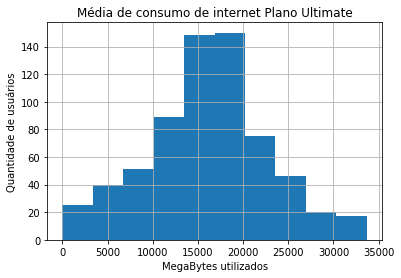

In [124]:
df_limp_ultimate['total_mb_used_internet'].hist()
plt.title('Média de consumo de internet Plano Ultimate')
plt.ylabel('Quantidade de usuários');
plt.xlabel('MegaBytes utilizados');

Ao analizar o consumo de internet podemos perceber que o perfil dos usuários do Plano Surf tem um variancia em torno de 44483398 mb, muito distante da média que entorno é 16103 mb, que implica na dispersão estatistica muito alta, com o desvio padrão entorno de 6669 mb. Isso resulta há varios tipos de perfis, dos que usam bastante internet e os que usam pouco, mas dentro da cota internet, com poucos casos excedem.

In [125]:
df_limp_ultimate['total_duration_calls'].var()


39297.57966386513

In [126]:
df_limp_ultimate['total_duration_calls'].std()


198.2361714316162

In [127]:
df_limp_ultimate['total_duration_calls'].mean()

390.3797276853253

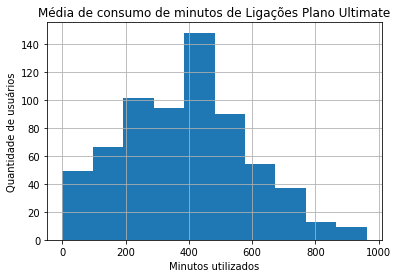

In [128]:
df_limp_ultimate['total_duration_calls'].hist()
plt.title('Média de consumo de minutos de Ligações Plano Ultimate')
plt.ylabel('Quantidade de usuários');
plt.xlabel('Minutos utilizados');

Ao analizar o consumo de tempo de ligações podemos perceber que o perfil dos usuários do Plano Ultimate tem um variancia em torno de 39297 minutos, muito distante da média que entorno é 198 minutos, que implica na dispersão estatistica menor que a média, com o desvio padrão entorno de 390 minutos. Isso resulta que o usuários tendem a utilizar menos ligações, dentro da cota de minutos.

In [129]:
df_limp_ultimate['count_messages'].var()


854.0491083298951

In [130]:
df_limp_ultimate['count_messages'].std()


29.224118606553308

In [131]:
df_limp_ultimate['count_messages'].mean()

32.65960665658094

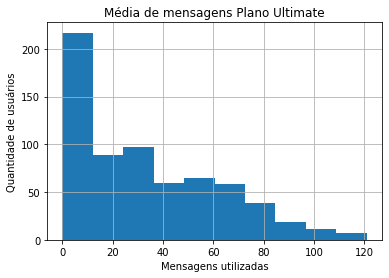

In [132]:
df_limp_ultimate['count_messages'].hist()
plt.title('Média de mensagens Plano Ultimate')
plt.ylabel('Quantidade de usuários');
plt.xlabel('Mensagens utilizadas');

Ao analizar o consumo de mensagens podemos perceber que o perfil dos usuários do Plano Ultimate tem um variancia em torno de 854 mensagens, muito próximo da média que entorno é 32 mensagens, que implica na dispersão estatistica muito baixa, com o desvio padrão entorno de 29 mensagens. Isso resulta que o usuários tendem ter o mesmo padrão de quantidade de mensagens, bem abaixo da cota de mensagens.

In [133]:
df_limp_ultimate['revenue'].var()

4.5271031036537845

In [134]:
df_limp_ultimate['revenue'].std()

2.1276990162271034

In [135]:
df_limp_ultimate['revenue'].mean()

70.27534039334341

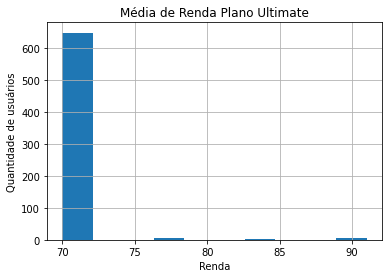

In [136]:
df_limp_ultimate['revenue'].hist()
plt.title('Média de Renda Plano Ultimate')
plt.ylabel('Quantidade de usuários');
plt.xlabel('Renda');

Ao analizar a renda do plano, podemos perceber que o perfil dos usuários do Plano Ultimate tem um variancia em torno de 4 dolares, muito distante da média que entorno é 70 dolares, que implica na dispersão estatistica muito baixa, com o desvio padrão entorno de 2 dolares. Isso resulta que o usuários tendem ter o mesmo padrão de valor de receita.

In [137]:
df_limp_ultimate['revenue'].sum()

46452.0

In [138]:
df_ultimate = df[df['plan_name']=='ultimate']
df_ultimate['revenue'].sum()

52066.0

Acima podemos ver a Receita total do nosso Plano Ultimate  que é 46452.0, e com os valores atipicos 52115.0

### Plano Surf

In [139]:
df_limp_surf = df_limp[df_limp['plan_name']=='surf']

In [140]:
df_limp_surf

,user_id,total_mb_used_internet,total_duration_calls,count_messages,month,first_name,last_name,age,city,reg_date,plan_name,revenue
1,1001,6919.15,171.14,30.0,8.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
2,1001,13314.82,297.69,44.0,9.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
3,1001,22330.49,374.11,53.0,10.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,90.09
4,1001,18504.30,404.59,36.0,11.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,60.00
5,1001,19369.18,392.93,44.0,12.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2393,1498,23137.69,324.77,0.0,12.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,100.00
2395,1499,12984.76,330.37,0.0,9.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,20.00
2396,1499,19492.43,363.28,0.0,10.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,70.00
2397,1499,16813.83,288.56,0.0,11.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,40.00


In [141]:
df_limp_surf['total_mb_used_internet'].var()

39660404.836281314

In [142]:
df_limp_surf['total_mb_used_internet'].std()

6297.6507394647815

In [143]:
df_limp_surf['total_mb_used_internet'].mean()

15234.113719772404

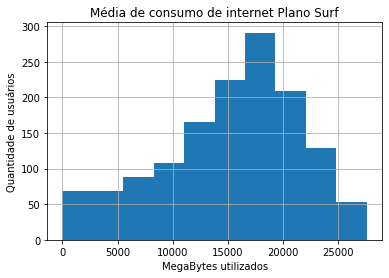

In [144]:
df_limp_surf['total_mb_used_internet'].hist()
plt.title('Média de consumo de internet Plano Surf')
plt.ylabel('Quantidade de usuários');
plt.xlabel('MegaBytes utilizados');

Ao analizar o consumo de internet podemos perceber que o perfil dos usuários do Plano Surf tem um variancia em torno de 39453516, muito distante da média que entorno é 15209 mb, que implica na dispersão estatistica muito alta, com o desvio padrão entorno de 6281 mb. Isso resulta que usuário tendem a ultrapassar a cota de internet.

In [145]:
df_limp_surf['total_duration_calls'].var()

40148.26481560982

In [146]:
df_limp_surf['total_duration_calls'].std()

200.37031919825307

In [147]:
df_limp_surf['total_duration_calls'].mean()

383.5864651493599

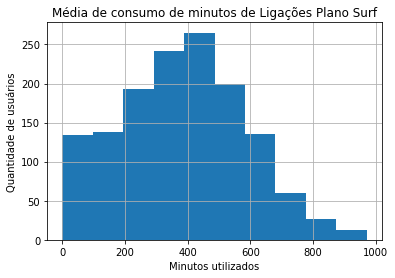

In [148]:
df_limp_surf['total_duration_calls'].hist()
plt.title('Média de consumo de minutos de Ligações Plano Surf')
plt.ylabel('Quantidade de usuários');
plt.xlabel('Minutos utilizados');

Ao analizar o consumo de tempo de ligações podemos perceber que o perfil dos usuários do Plano Surf tem um variancia em torno de 40077 minutos, muito distante da média que entorno é 383 minutos, que implica na dispersão estatistica menor que a média, com o desvio padrão entorno de 200 minutos. Isso resulta que a maioria usuários tendem a utilizar quase toda a cota de ligações e em boa parte ultrapassar a cota.

In [149]:
df_limp_surf['count_messages'].var()

727.663006535286

In [150]:
df_limp_surf['count_messages'].std()

26.975229499214386

In [151]:
df_limp_surf['count_messages'].mean()

27.041963015647227

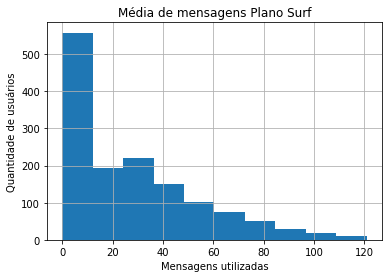

In [152]:
df_limp_surf['count_messages'].hist()
plt.title('Média de mensagens Plano Surf')
plt.ylabel('Quantidade de usuários');
plt.xlabel('Mensagens utilizadas');

Ao analizar o consumo de mensagens podemos perceber que o perfil dos usuários do Plano Surf tem um variancia em torno de 727 mensagens, muito distante da média que entorno é 26 mensagens, que implica na dispersão estatistica muito baixa, com o desvio padrão entorno de 27 mensagens. Isso resulta que o usuários tendem ter o mesmo padrão de quantidade de mensagens, bem abaixo da cota de mensagens.

In [153]:
df_limp_surf['revenue'].var()

1074.2409385665399

In [154]:
df_limp_surf['revenue'].std()

32.77561499905898

In [155]:
df_limp_surf['revenue'].mean()

48.12478662873401

<AxesSubplot:>

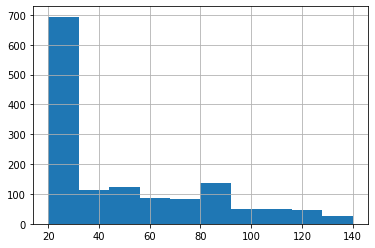

In [156]:
df_limp_surf['revenue'].hist()


Ao analizar a renda do plano, podemos perceber que o perfil dos usuários do Plano Surf tem um variancia em torno de 1101 dolares, muito distante da média que entorno é 48 dolares, que implica na dispersão estatistica muito alta, com o desvio padrão entorno de 33 dolares. Isso resulta que o usuários tendem a pagar penelidades.

In [157]:
df_limp_surf['revenue'].sum()

67663.45000000001

In [158]:
df_surf = df[df['plan_name']=='surf']
df_surf['revenue'].sum()

94902.19

Acima podemos ver a Receita total do nosso Plano Surf que é 67901.23, e com os valores atipicos 96042.19

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Gabriel, pude verificar que soube calcular as médias, desvios padrão e variância das colunas para cada plano, muito bem!
</div>

## Testando hipóteses

### Hipótese sobre a Igualdade das Médias 

#### A receita média dos usuários dos planos Ultimate e Surf são iguais?

In [159]:
alpha = 0.05

In [160]:
results = st.ttest_ind(df_limp_surf['revenue'], df_limp_ultimate['revenue'],equal_var = False)

In [161]:
print('p-value:', results.pvalue)

p-value: 1.7994120601905387e-116


In [162]:
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Nós rejeitamos a hipótese nula


O valor-p nos diz que os valores médios de receita diferem dos planos, mas não temos dados suficientes para dizer como.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok! E na verdade você pode verificar a partir da média e do desvio padrão dos planos

</div>

#### A receita média dos usuários da área de NY-NJ é igual dos usuários de outras regiões?

In [163]:
df_ny_nj = df_limp.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA' ")


In [164]:
df_other = df_limp.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA' ")


In [165]:
results_ny = st.ttest_ind(df_ny_nj['revenue'], df_other['revenue'],equal_var = False)

In [166]:
print('p-value:', results_ny.pvalue)

p-value: 0.01371295408645689


In [167]:
if results_ny.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Nós rejeitamos a hipótese nula


O valor-p nos diz que, embora os valores médios para NY-NJ sobre as demais cidades sejam diferentes, há uma probabilidade de 2% de obter aleatoriamente uma diferença desse tamanho ou maior. Esta probabilidade é suficiente para concluir que há uma diferença significativa entre os valores médios gastos.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ótimo! Hipóteses bem testadas e com conclusões corretas, muito bom!

</div>

## Conclusão geral

Neste projeto, importamos bibliotecas como "pandas" e "numpy" para construção de graficos para melhor visualização e entendimento do problema.

Com base nos estudos realizamos o pré-processamento de dados,em cada coluna realizamos a padronização de estilos, modificamos valores incongruentes, substituimos valores ausentes com base em estudos sobre outras colunas com valores devidamente preenchidos, verificamos as duplicatas de valores existente na base de dados,e realizamos o estudo os dados coletados para determinar quais dos planos dão mais receita.

Com base na Análise exploratória de dados,concluimos que o Plano Surf tem maior receita, pois seu plano é muito restrivo, com penalidades severas e isso acaba acaretando em uma receita maior, mas também e uma contra propaganda para novos usuários.

Sobre as hipoteses levantadas não podemos afirmar que a média dos usuários dos planos Ultimate e Surf são iguais, porém sobre a  receita média dos usuários da área de NY-NJ serem iguais dos usuários de outras regiões é suficiente para concluir que há uma diferença significativa entre os valores médios gastos.